In [1]:
import pandas as pd

# Load the dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv"
column_names = ['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth', 'Species']
iris_data = pd.read_csv(url, header=None, names=column_names)


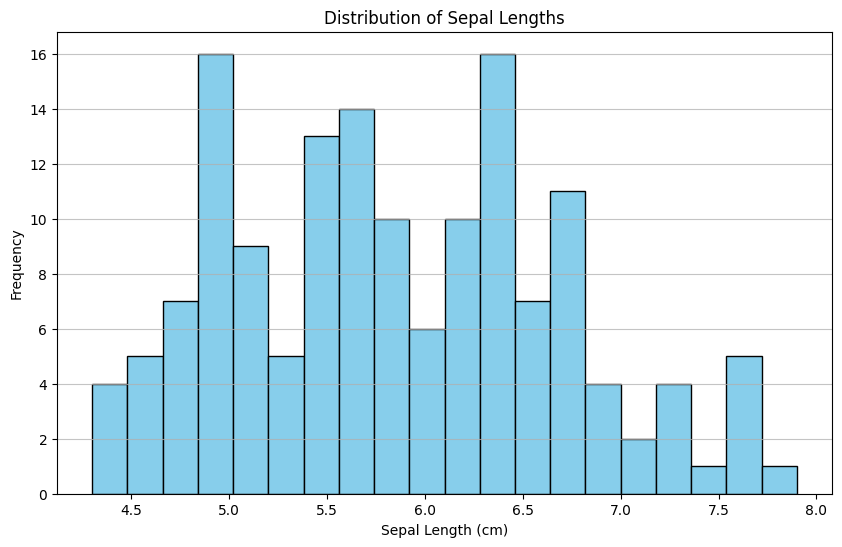

In [2]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(iris_data['SepalLength'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Sepal Lengths')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()


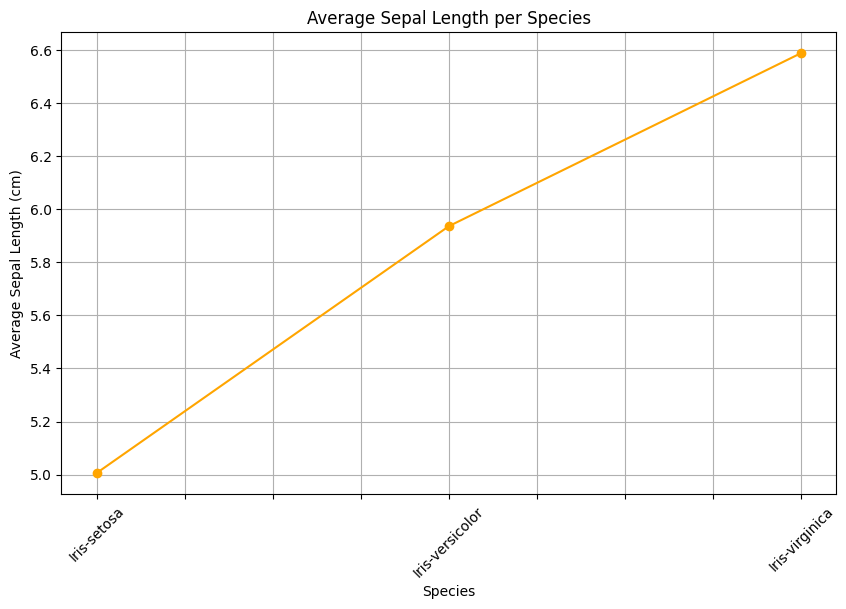

In [3]:
# Calculate average sepal length by species
avg_sepal_length = iris_data.groupby('Species')['SepalLength'].mean()

plt.figure(figsize=(10, 6))
avg_sepal_length.plot(kind='line', marker='o', color='orange')
plt.title('Average Sepal Length per Species')
plt.xlabel('Species')
plt.ylabel('Average Sepal Length (cm)')
plt.grid()
plt.xticks(rotation=45)
plt.show()


<Figure size 1000x600 with 0 Axes>

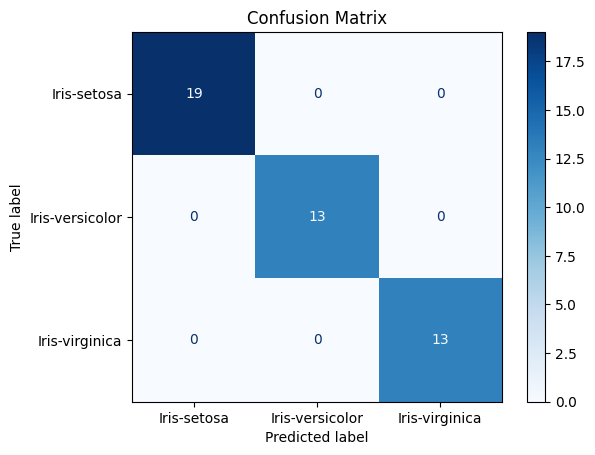

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Prepare the data
X = iris_data.drop('Species', axis=1)
y = iris_data['Species']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a Decision Tree Classifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)

# Make predictions
y_pred = classifier.predict(X_test)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=classifier.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifier.classes_)

plt.figure(figsize=(10, 6))
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()
